# Spotify Top 100 Songs EDA (2000-2023) 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
spotify_df = pd.read_csv('Datasets/Best Songs on Spotify from 2000-2023.csv', sep=';')

## Extract the years from 2000 to 2023

In [6]:
spotify_df = spotify_df[spotify_df['year'] >= 2000]

### Return the first 5 rows

In [10]:
spotify_df.head()

,title,artist,top genre,year,bpm,energy,danceability,dB,liveness,valence,duration,acousticness,speechiness,popularity
0,Flowers,Miley Cyrus,pop,2023,118,68,71,-4,3,65,200,6,7,98
1,Cupid - Twin Ver.,FIFTY FIFTY,k-pop girl group,2023,120,59,78,-8,35,73,174,44,3,97
2,BESO,ROSALÍA,pop,2023,95,64,77,-7,17,53,195,74,14,96
3,Boy's a liar Pt. 2,PinkPantheress,bronx drill,2023,133,81,70,-8,25,86,131,25,5,96
4,Creepin' (with The Weeknd & 21 Savage),Metro Boomin,rap,2022,98,62,72,-6,8,17,222,42,5,96


### Check the data info

In [11]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2338 entries, 0 to 2384
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          2338 non-null   object
 1   artist         2338 non-null   object
 2   top genre      2338 non-null   object
 3   year           2338 non-null   int64 
 4   bpm            2338 non-null   int64 
 5   energy         2338 non-null   int64 
 6   danceability   2338 non-null   int64 
 7   dB             2338 non-null   int64 
 8   liveness       2338 non-null   int64 
 9   valence        2338 non-null   int64 
 10  duration       2338 non-null   int64 
 11  acousticness   2338 non-null   int64 
 12  speechiness    2338 non-null   int64 
 13  popularity     2338 non-null   int64 
dtypes: int64(11), object(3)
memory usage: 274.0+ KB


### Shape of the data

In [12]:
print('The shape of the data:', spotify_df.shape)

The shape of the data: (2338, 14)


### Summarize the data

In [13]:
spotify_df.describe()

,year,bpm,energy,danceability,dB,liveness,valence,duration,acousticness,speechiness,popularity
count,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000
mean,2011.370830,119.789564,69.678358,66.994867,-5.760907,17.782293,54.042772,225.628315,15.617622,10.153550,70.523952
std,6.564824,27.300813,16.153867,13.740550,2.062704,13.630653,22.376688,43.271234,20.353573,9.537617,11.472860
min,2000.000000,60.000000,6.000000,18.000000,-18.000000,2.000000,4.000000,115.000000,0.000000,2.000000,5.000000
25%,2006.000000,98.000000,59.000000,59.000000,-7.000000,9.000000,37.000000,200.000000,2.000000,4.000000,64.000000
50%,2012.000000,120.000000,71.000000,68.000000,-5.000000,12.000000,54.000000,221.000000,7.000000,6.000000,72.000000
75%,2017.000000,134.000000,82.000000,77.000000,-4.000000,23.000000,72.000000,245.000000,22.000000,12.000000,79.000000
max,2023.000000,211.000000,100.000000,98.000000,0.000000,84.000000,97.000000,688.000000,98.000000,58.000000,98.000000


### Count NaN values for each columns

In [14]:
spotify_df.isnull().sum()

title            0
artist           0
top genre        0
year             0
bpm              0
energy           0
danceability     0
dB               0
liveness         0
valence          0
duration         0
acousticness     0
speechiness      0
popularity       0
dtype: int64

In [15]:
print('Number of duplicated rows:', len(spotify_df[spotify_df.duplicated()]))
print('--------------------------------------------------')
print('Number of unique artists:', spotify_df['artist'].nunique())
print('--------------------------------------------------')
print('Number of unique songs:', spotify_df['title'].nunique())
print('--------------------------------------------------')
print('Number of unique genres:', spotify_df['top genre'].nunique())

Number of duplicated rows: 0
--------------------------------------------------
Number of unique artists: 994
--------------------------------------------------
Number of unique songs: 2216
--------------------------------------------------
Number of unique genres: 265


## Analysis

### 1. Return the 10 most popular genres

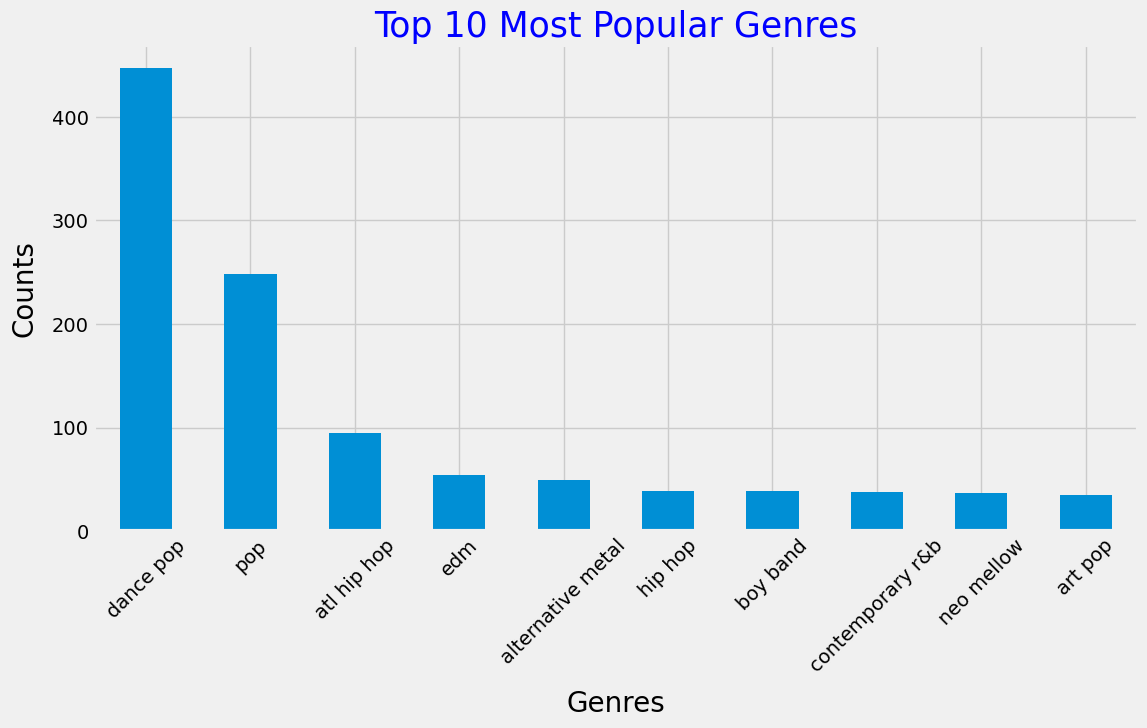

In [16]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(12,6))
spotify_df['top genre'].value_counts().nlargest(10).plot(kind='bar')
plt.xlabel('Genres', labelpad=10, fontsize=20)
plt.ylabel('Counts', labelpad=10, fontsize=20)
plt.title('Top 10 Most Popular Genres', fontsize=25, color='blue')
plt.xticks(rotation=45)
plt.show()

***Dance pop* is the most popular genre throughout 2000 to 2023, followed by *pop*. Popularity is measured by total amount of songs that reached the top 100 on Spotify.**

## Top 15 artists with most songs in top 100

Text(0.5, 1.0, 'Top 15 Artists with Most Songs in Top 100')

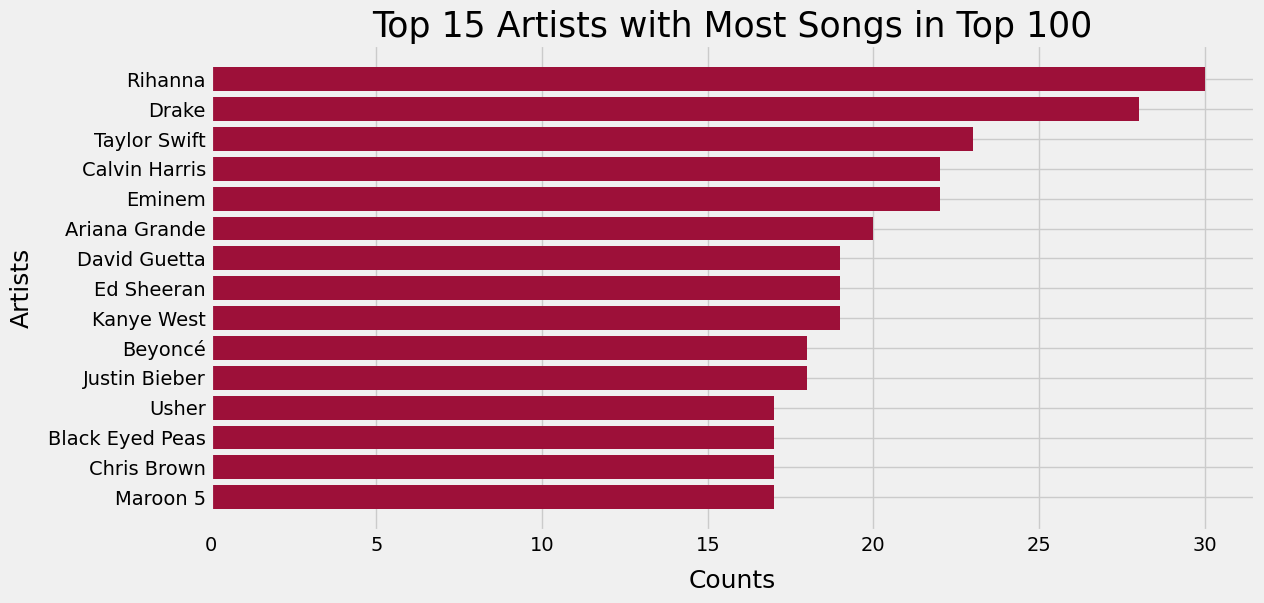

In [17]:
artist_nums = spotify_df['artist'].value_counts().nlargest(15).sort_values()

plt.figure(figsize=(12,6))
plt.barh(artist_nums.index.values, artist_nums, color='#9D1039')
plt.xlabel('Counts', labelpad=10, fontsize=18)
plt.ylabel('Artists', labelpad=10, fontsize=18)
plt.title('Top 15 Artists with Most Songs in Top 100', fontsize=25)

***Rihanna* has the most songs in the top 100, followed by *Drake* and *Taylor Swift*.**

## Total number of songs for each year from 2000 to 2023

Text(0.5, 1.0, 'Number of Songs (2000-2023)')

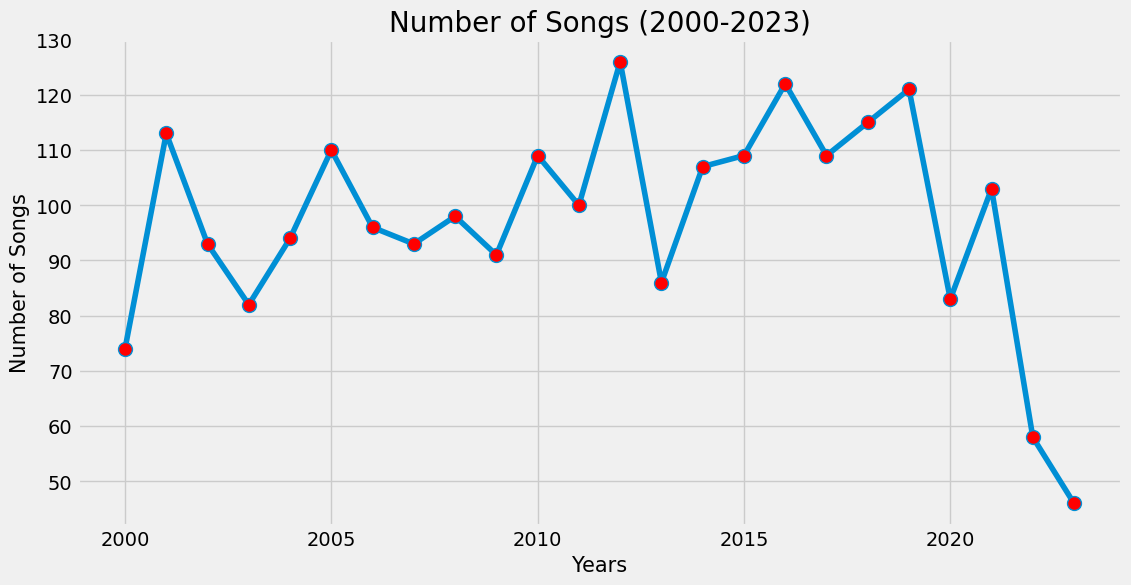

In [18]:
years = spotify_df['year'].value_counts().sort_index()

plt.figure(figsize=(12,6))
plt.plot(years.index.values, years, marker='o', markerfacecolor='red', markersize=10)
plt.xlabel('Years', fontsize=15)
plt.ylabel('Number of Songs', fontsize=15)
plt.title('Number of Songs (2000-2023)', fontsize=20)

***2012* has the most songs in the top 100**

In [19]:
# initialize all the numerical columns
numerical_cols = list(spotify_df.columns[4:])
print(numerical_cols)

['bpm', 'energy', 'danceability ', 'dB', 'liveness', 'valence', 'duration', 'acousticness', 'speechiness ', 'popularity']


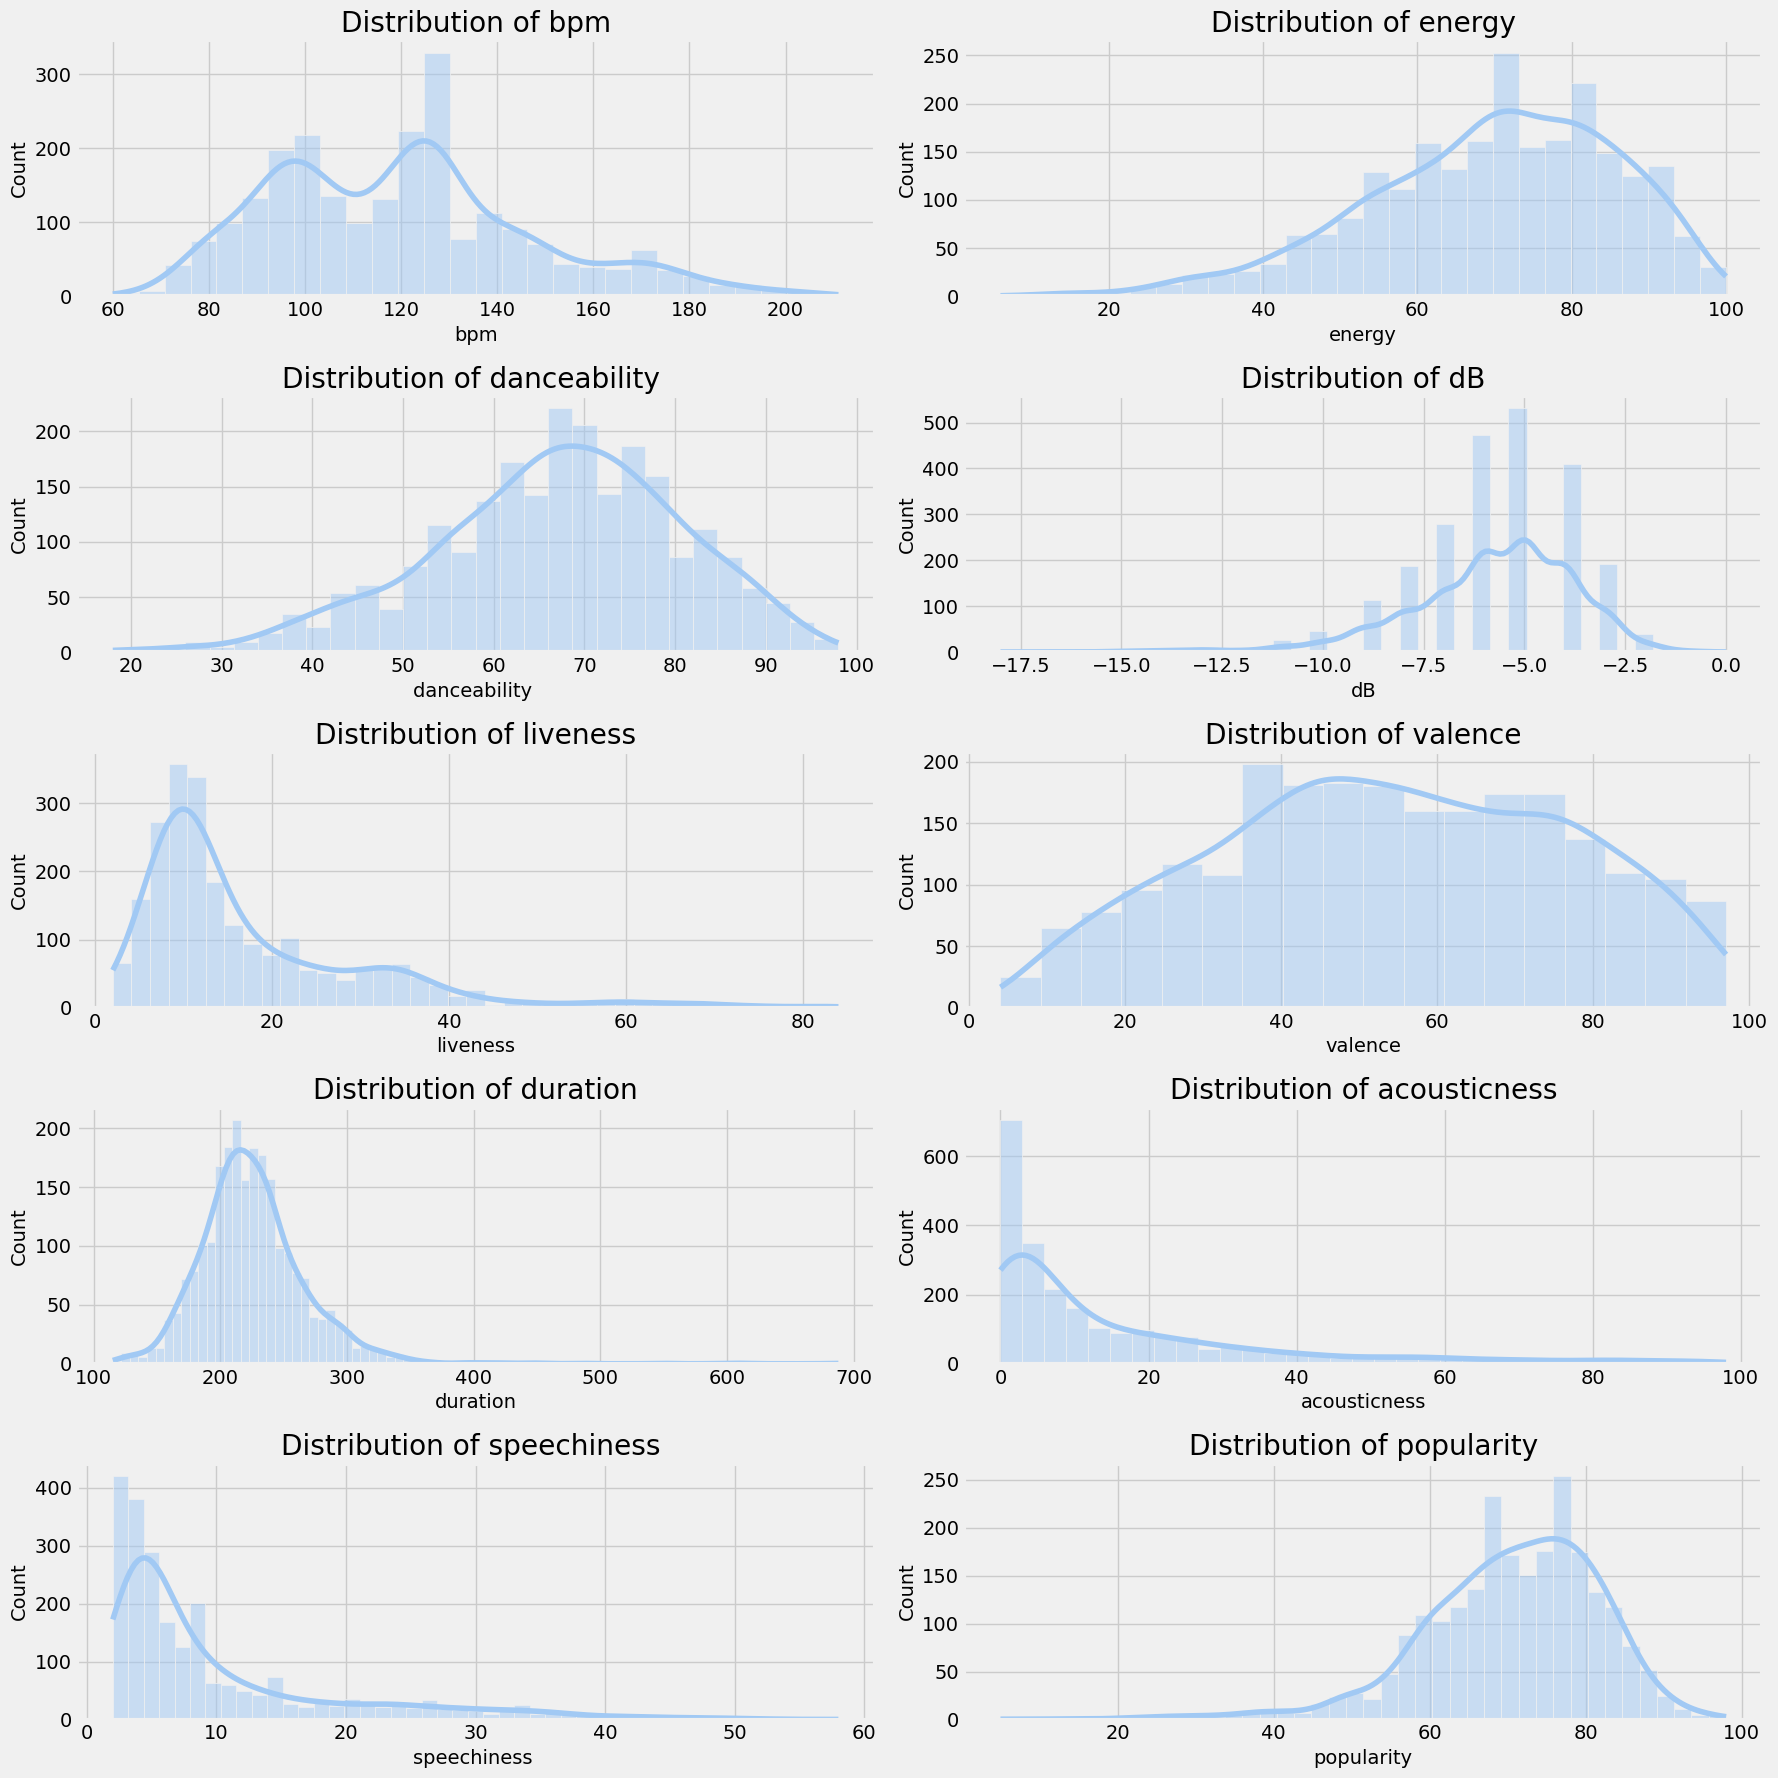

In [20]:
sns.set_palette('pastel')

plt.figure(figsize=(18,18))
for i, ax in enumerate(numerical_cols):
    plt.subplot(5,2,i+1)
    sns.histplot(x=ax, data=spotify_df, kde=True).set(title=f'Distribution of {ax}')
    plt.tight_layout()

**Findings**
* BPM normally range from 90 to 130
* Songs tend to be energetic and high danceability
* dB usually range around -5.0
* Many songs have low liveness, which indicates the less likelihood these songs are live recording
* The valence (mood) of songs tend to vary
* The duration of songs are usually around 3-4 minutes
* Songs have low acoussticness and speechiness

## Top 3 Artists

Let's analyze the top 3 artists (Rihanna, Drake, and Taylor Swift) separately

## 1. Rihanna

In [21]:
# Rihanna

rihanna = spotify_df[spotify_df['artist'] == 'Rihanna']

### Number of songs by Rihanna in the top 100

<Axes: title={'center': 'Number of Songs by Rihanna in Top 100 by Years'}, xlabel='year'>

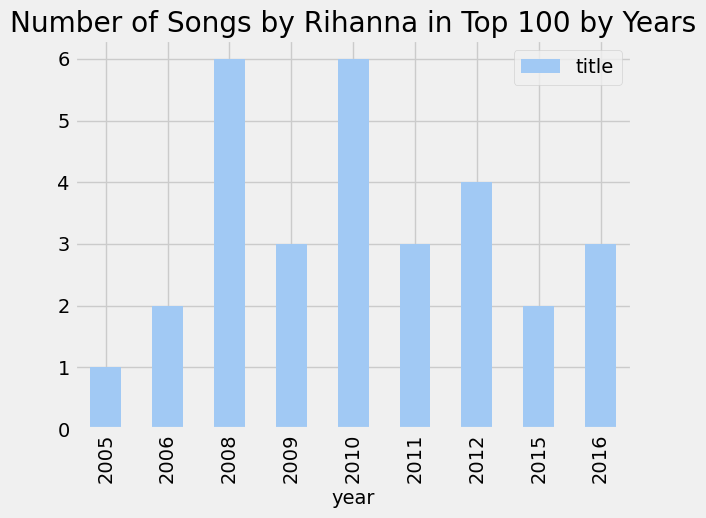

In [22]:
rihanna.groupby('year')[['title']].count().plot(kind='bar', title='Number of Songs by Rihanna in Top 100 by Years')

***Rihanna* has the most songs (6) in 2008 and 2010 that were in the top 100**

### Rihanna's popularity throughout the years

/var/folders/1x/lwpp87qj79lg912xb7k9v0m00000gn/T/ipykernel_18703/2179805696.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=rihanna, x='year', y='popularity', ci=None, estimator=sum)


<Axes: xlabel='year', ylabel='popularity'>

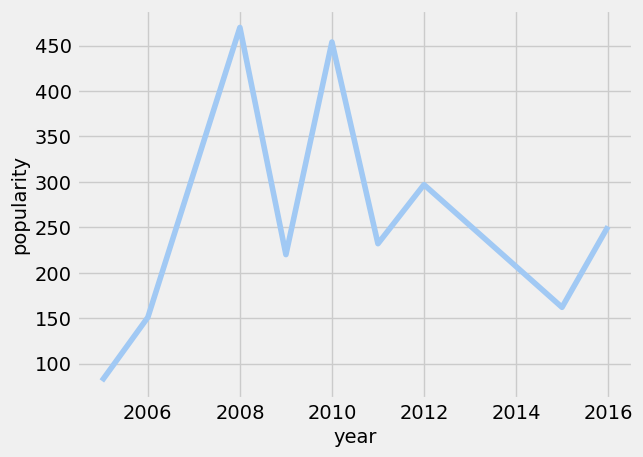

In [23]:
sns.lineplot(data=rihanna, x='year', y='popularity', ci=None, estimator=sum)

***2008* and *2010* are two of the most Rihanna's successful years due to the her albums (Good Girl Gone Bad and Gone), indicated by the spikes.**

In [24]:
rihanna[rihanna['year'] == 2008]

,title,artist,top genre,year,bpm,energy,danceability,dB,liveness,valence,duration,acousticness,speechiness,popularity
174,Umbrella,Rihanna,barbadian pop,2008,174,83,58,-5,4,57,276,1,13,85
313,Don't Stop The Music,Rihanna,barbadian pop,2008,123,67,84,-6,5,54,267,3,6,82
454,Disturbia,Rihanna,barbadian pop,2008,125,81,71,-5,17,72,239,9,6,80
677,Take A Bow,Rihanna,barbadian pop,2008,82,47,70,-8,9,57,229,25,7,78
1072,Hate That I Love You,Rihanna,barbadian pop,2008,94,73,64,-5,10,73,219,32,9,73
1184,Shut Up And Drive,Rihanna,barbadian pop,2008,133,83,74,-5,20,74,212,0,3,72


### Explore the distribution of songs' characteristics from Rihanna

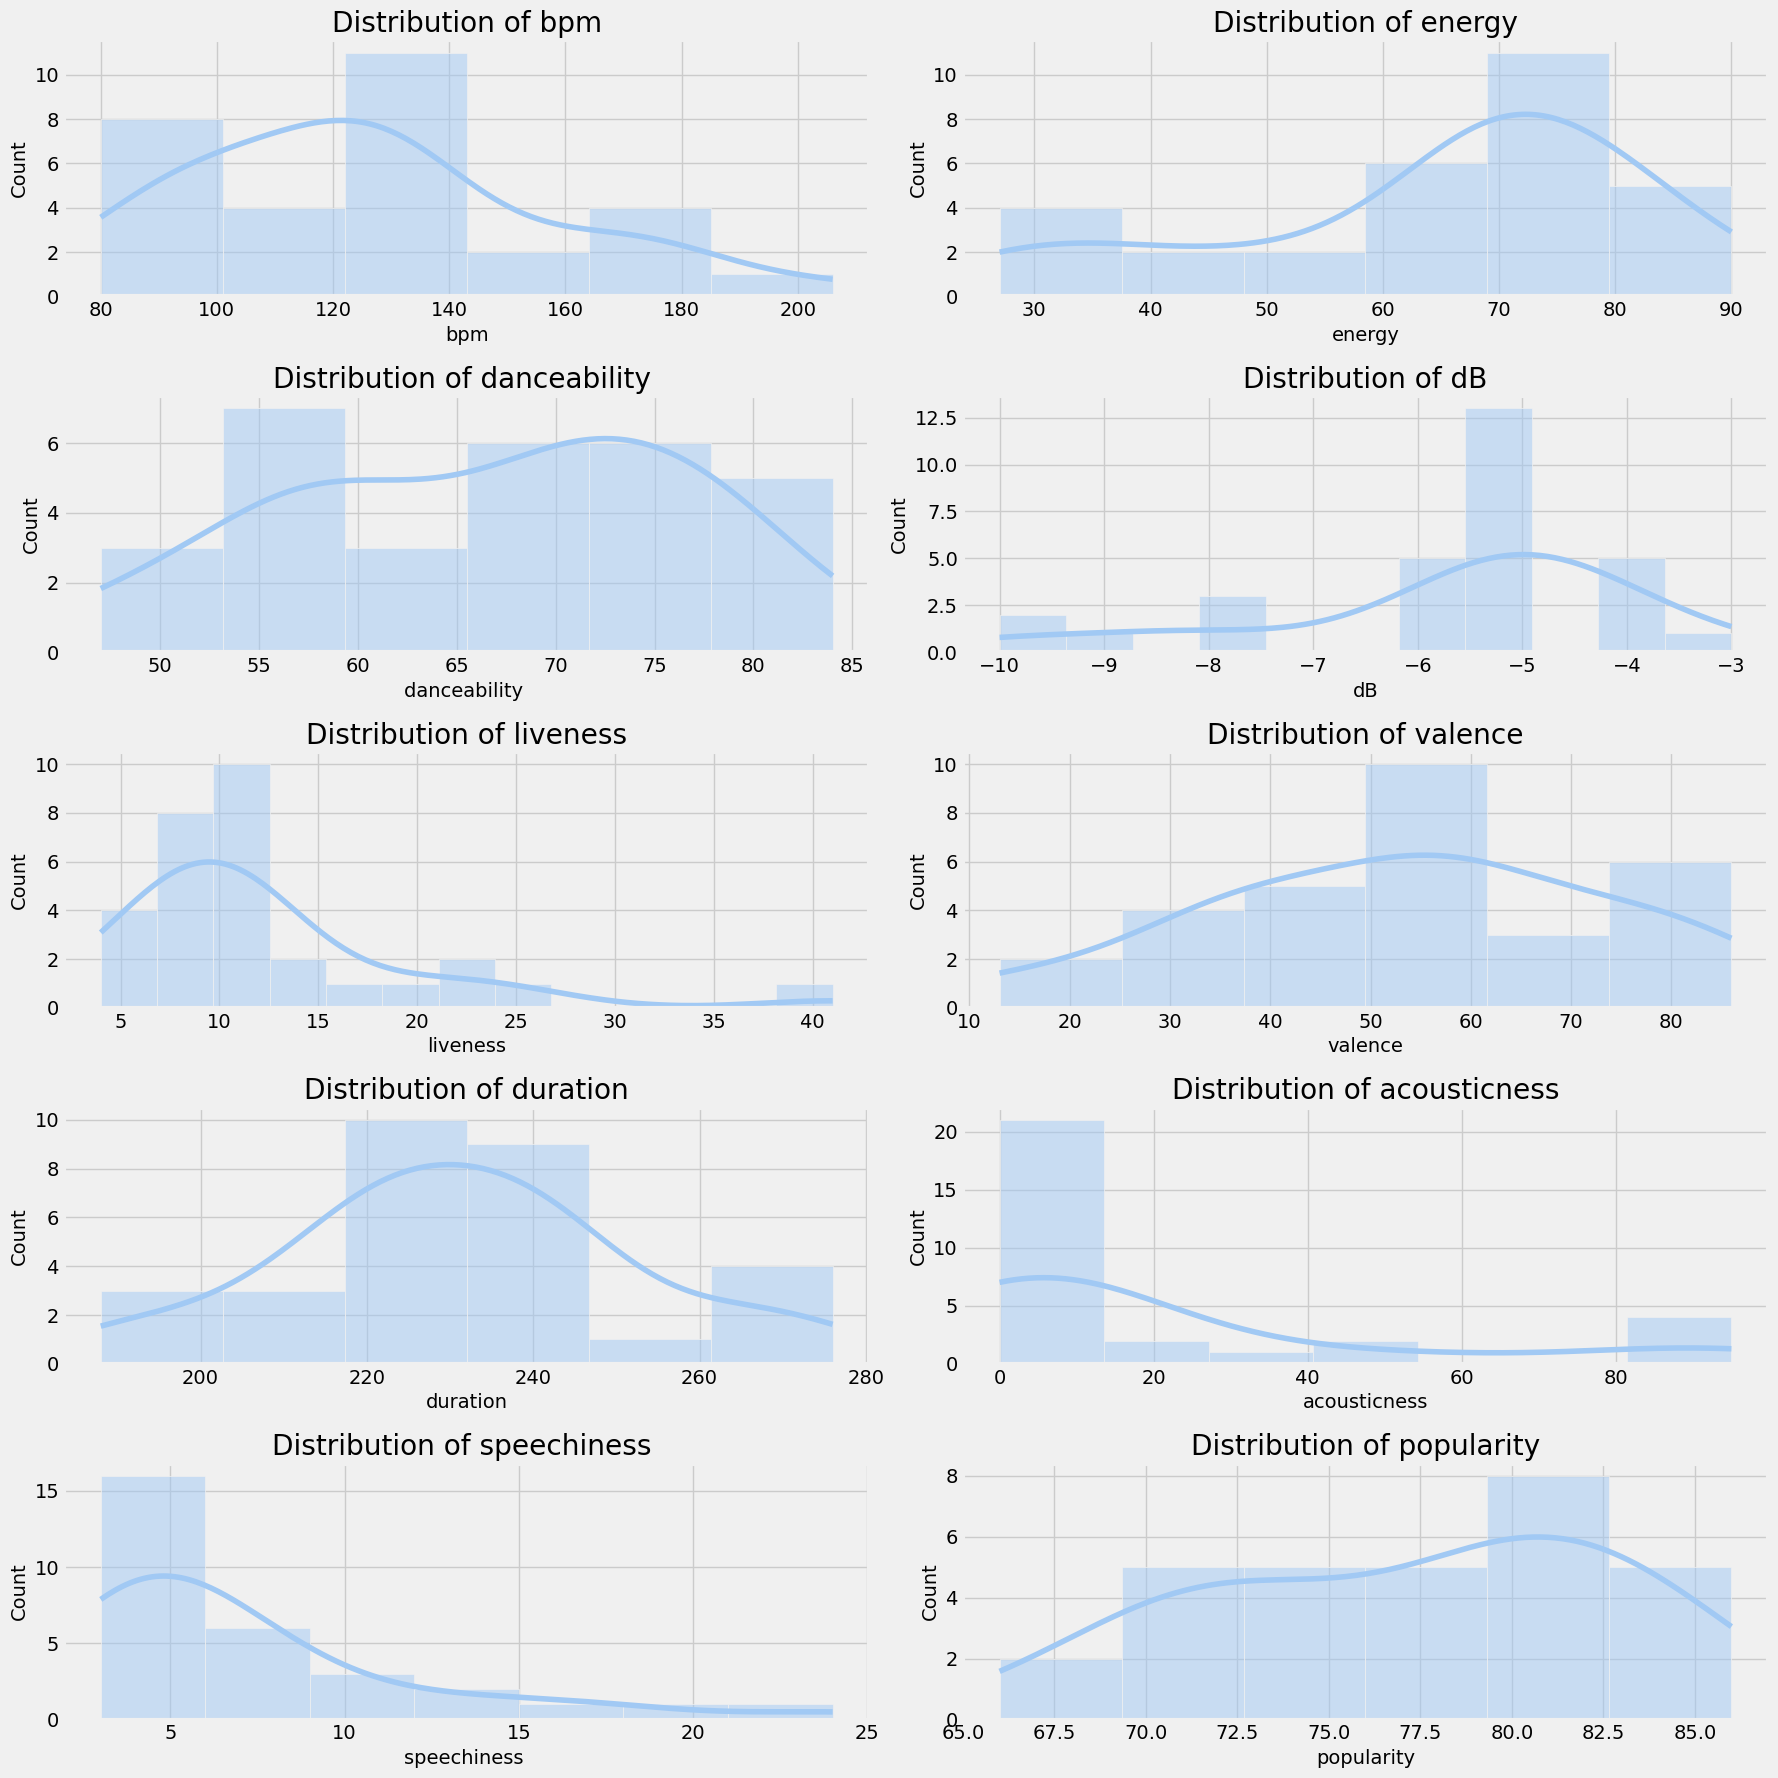

In [25]:
plt.figure(figsize=(18,18))
for i, ax in enumerate(numerical_cols):
    plt.subplot(5,2,i+1)
    sns.histplot(x=ax, data=rihanna, kde=True).set(title=f'Distribution of {ax}')
    plt.tight_layout()

## 2. Drake

In [26]:
drake = spotify_df[spotify_df['artist'] == 'Drake']

### Number of songs by Drake in the top 100

<Axes: title={'center': 'Number of Songs by Drake in Top 100 by Years'}, xlabel='year'>

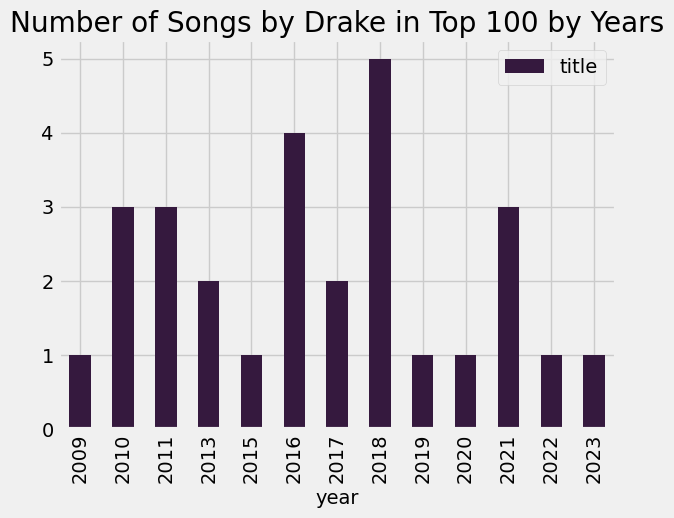

In [27]:
sns.set_palette('rocket')

drake.groupby('year')[['title']].count().plot(kind='bar', title='Number of Songs by Drake in Top 100 by Years')

***Drake* has the most songs (5) in top 100 in 2018.**

### Drake's popularity throughout the years

/var/folders/1x/lwpp87qj79lg912xb7k9v0m00000gn/T/ipykernel_18703/3385901986.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=drake, x='year', y='popularity', ci=None, estimator=sum)


<Axes: xlabel='year', ylabel='popularity'>

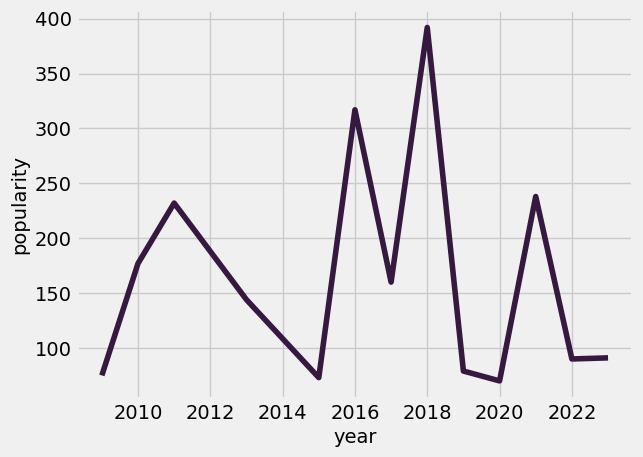

In [28]:
sns.lineplot(data=drake, x='year', y='popularity', ci=None, estimator=sum)

***Drake* was extremely popular in 2016 and 2018 due two of his biggest albums (Scorpion and Views)**

### Explore the distribution of songs' characteristics from Drake

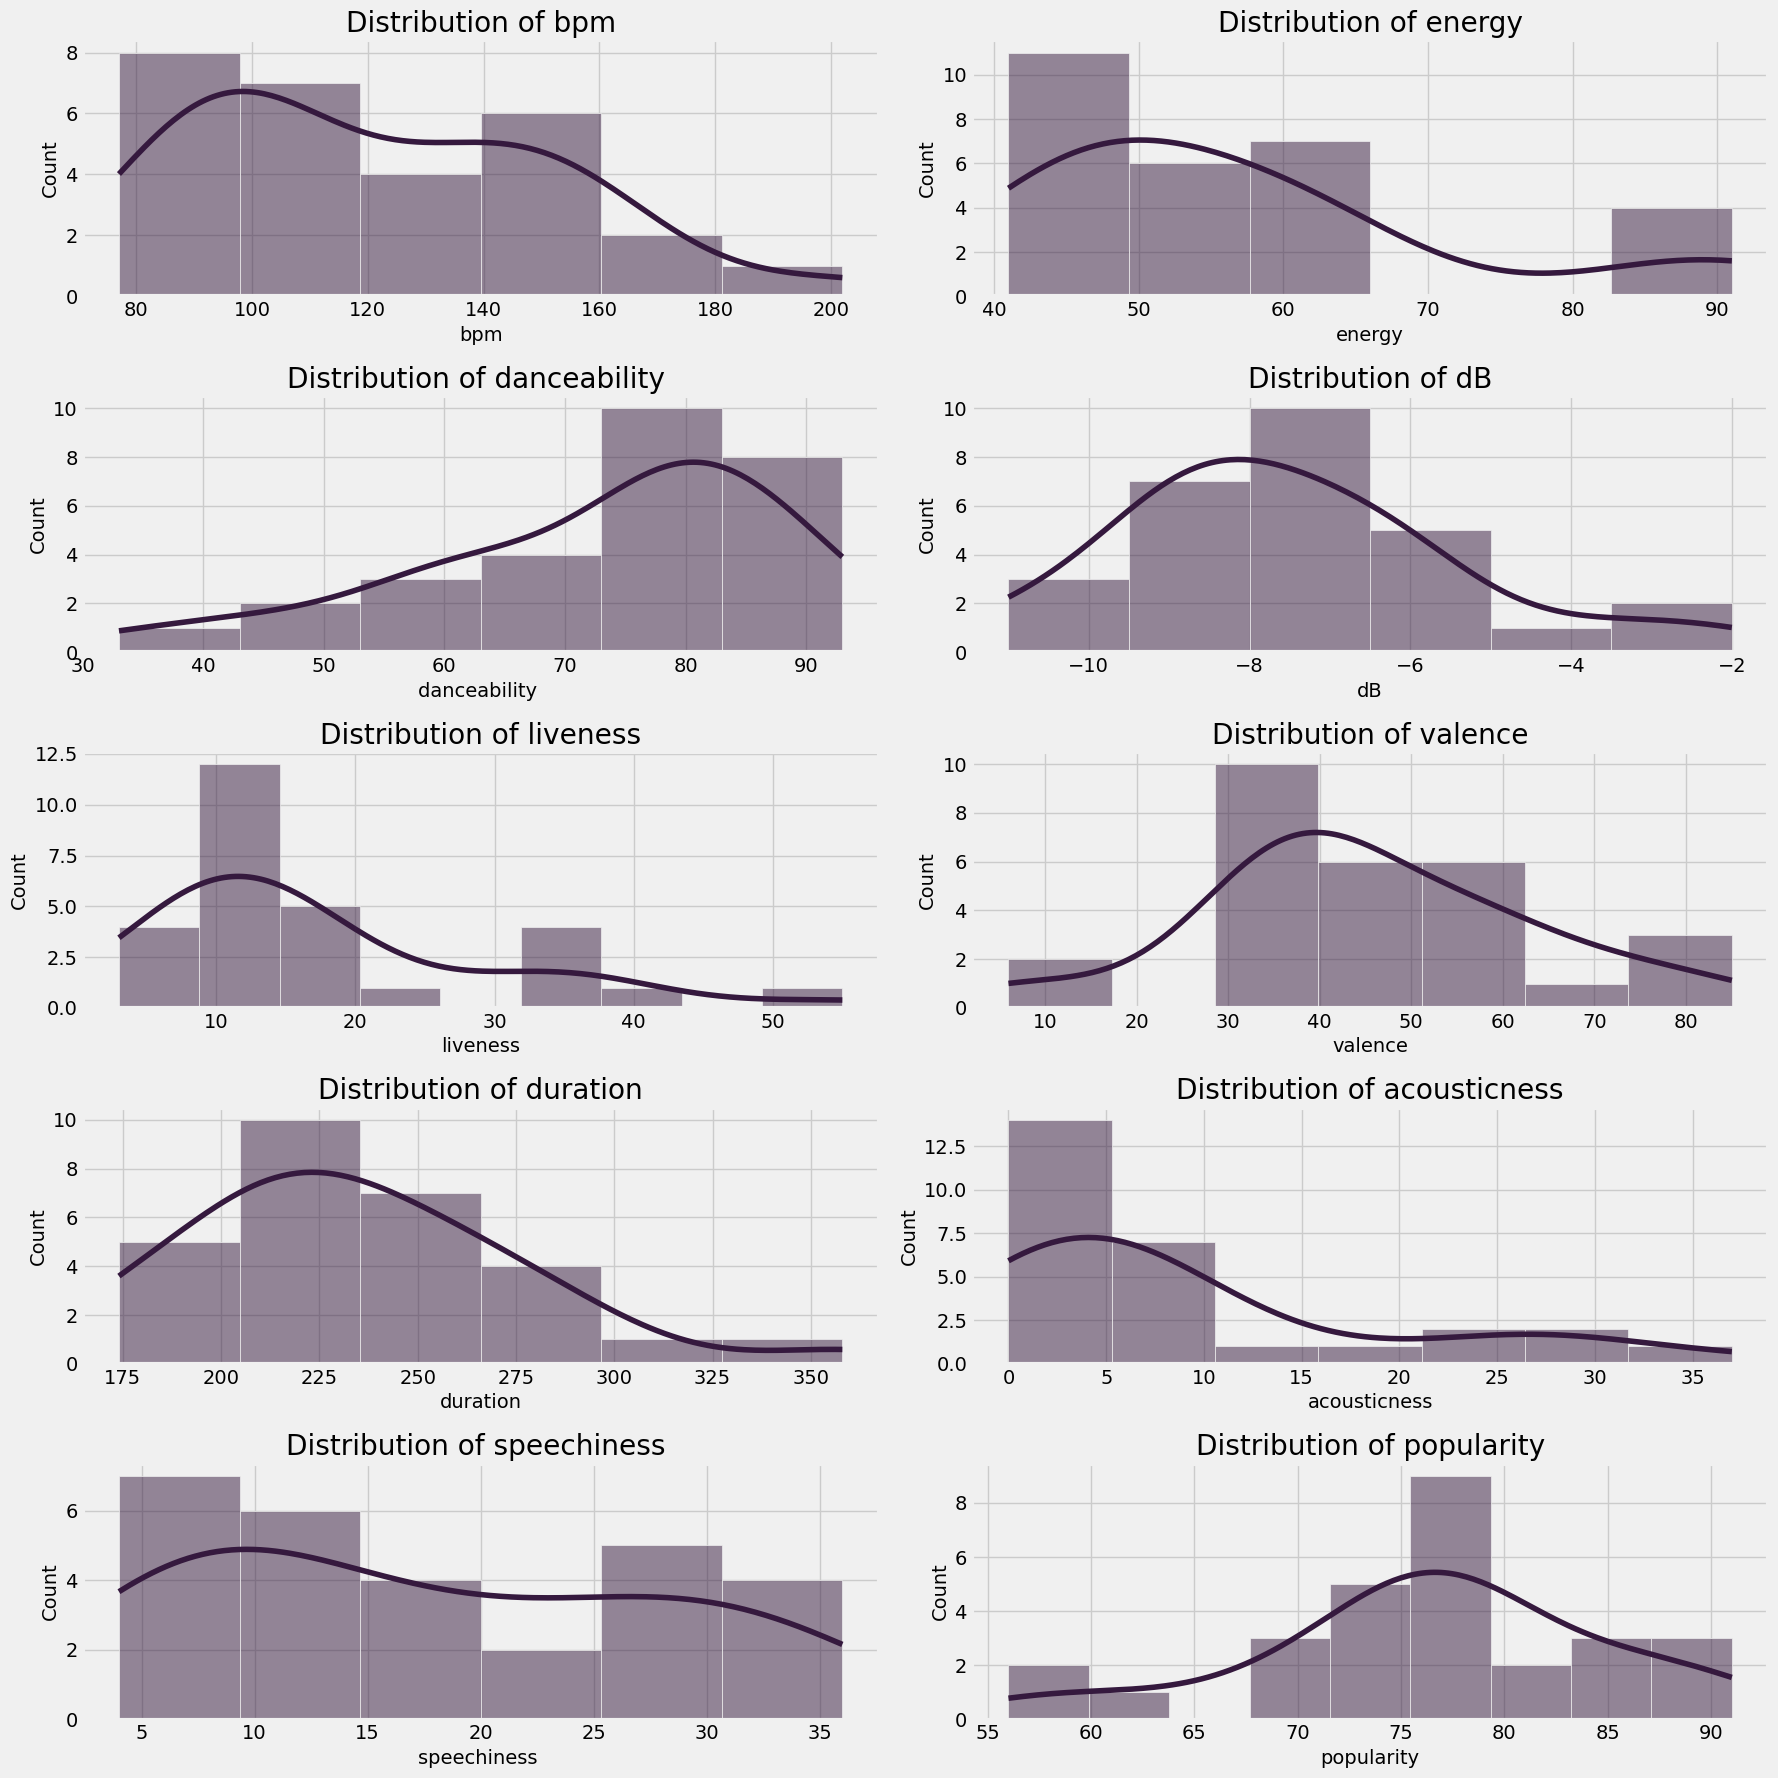

In [29]:
plt.figure(figsize=(18,18))
for i, ax in enumerate(numerical_cols):
    plt.subplot(5,2,i+1)
    sns.histplot(x=ax, data=drake, kde=True).set(title=f'Distribution of {ax}')
    plt.tight_layout()

## 3. Taylor Swift

In [30]:
taylor_swift = spotify_df[spotify_df['artist'] == 'Taylor Swift']

### Number of songs by Taylor Swift in the top 100

<Axes: title={'center': 'Number of Songs by Taylor Swift in Top 100 by Years'}, xlabel='year'>

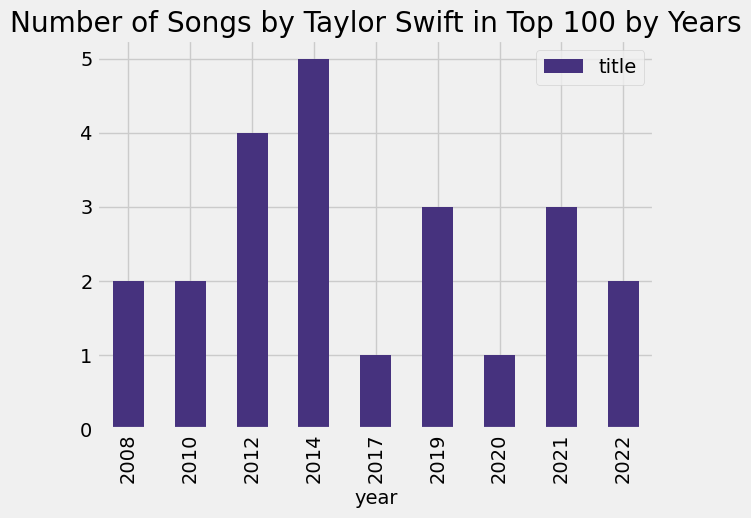

In [31]:
sns.set_palette('viridis')

taylor_swift.groupby('year')[['title']].count().plot(kind='bar', title='Number of Songs by Taylor Swift in Top 100 by Years')

***Taylor Swift* has the most songs (5) in 2014 for the top 100.**

### Taylor Swift's popularity throughout the years

/var/folders/1x/lwpp87qj79lg912xb7k9v0m00000gn/T/ipykernel_18703/3382094061.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=taylor_swift, x='year', y='popularity', ci=None, estimator=sum)


Text(0.5, 1.0, "Taylor Swift's Popularity by Years")

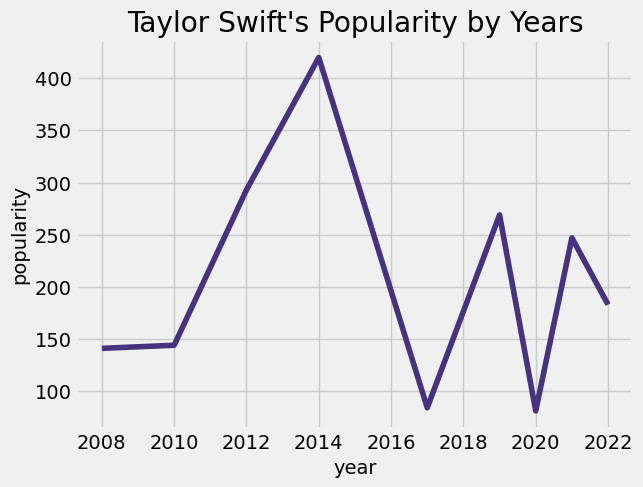

In [32]:
sns.lineplot(data=taylor_swift, x='year', y='popularity', ci=None, estimator=sum)
plt.title("Taylor Swift's Popularity by Years")

***Taylor Swift* has a spike in 2014, which indicates her peak in popularity due to her tremendous successful album (1989) in 2014.**

### Explore the distribution of songs' characteristics from Taylor Swift

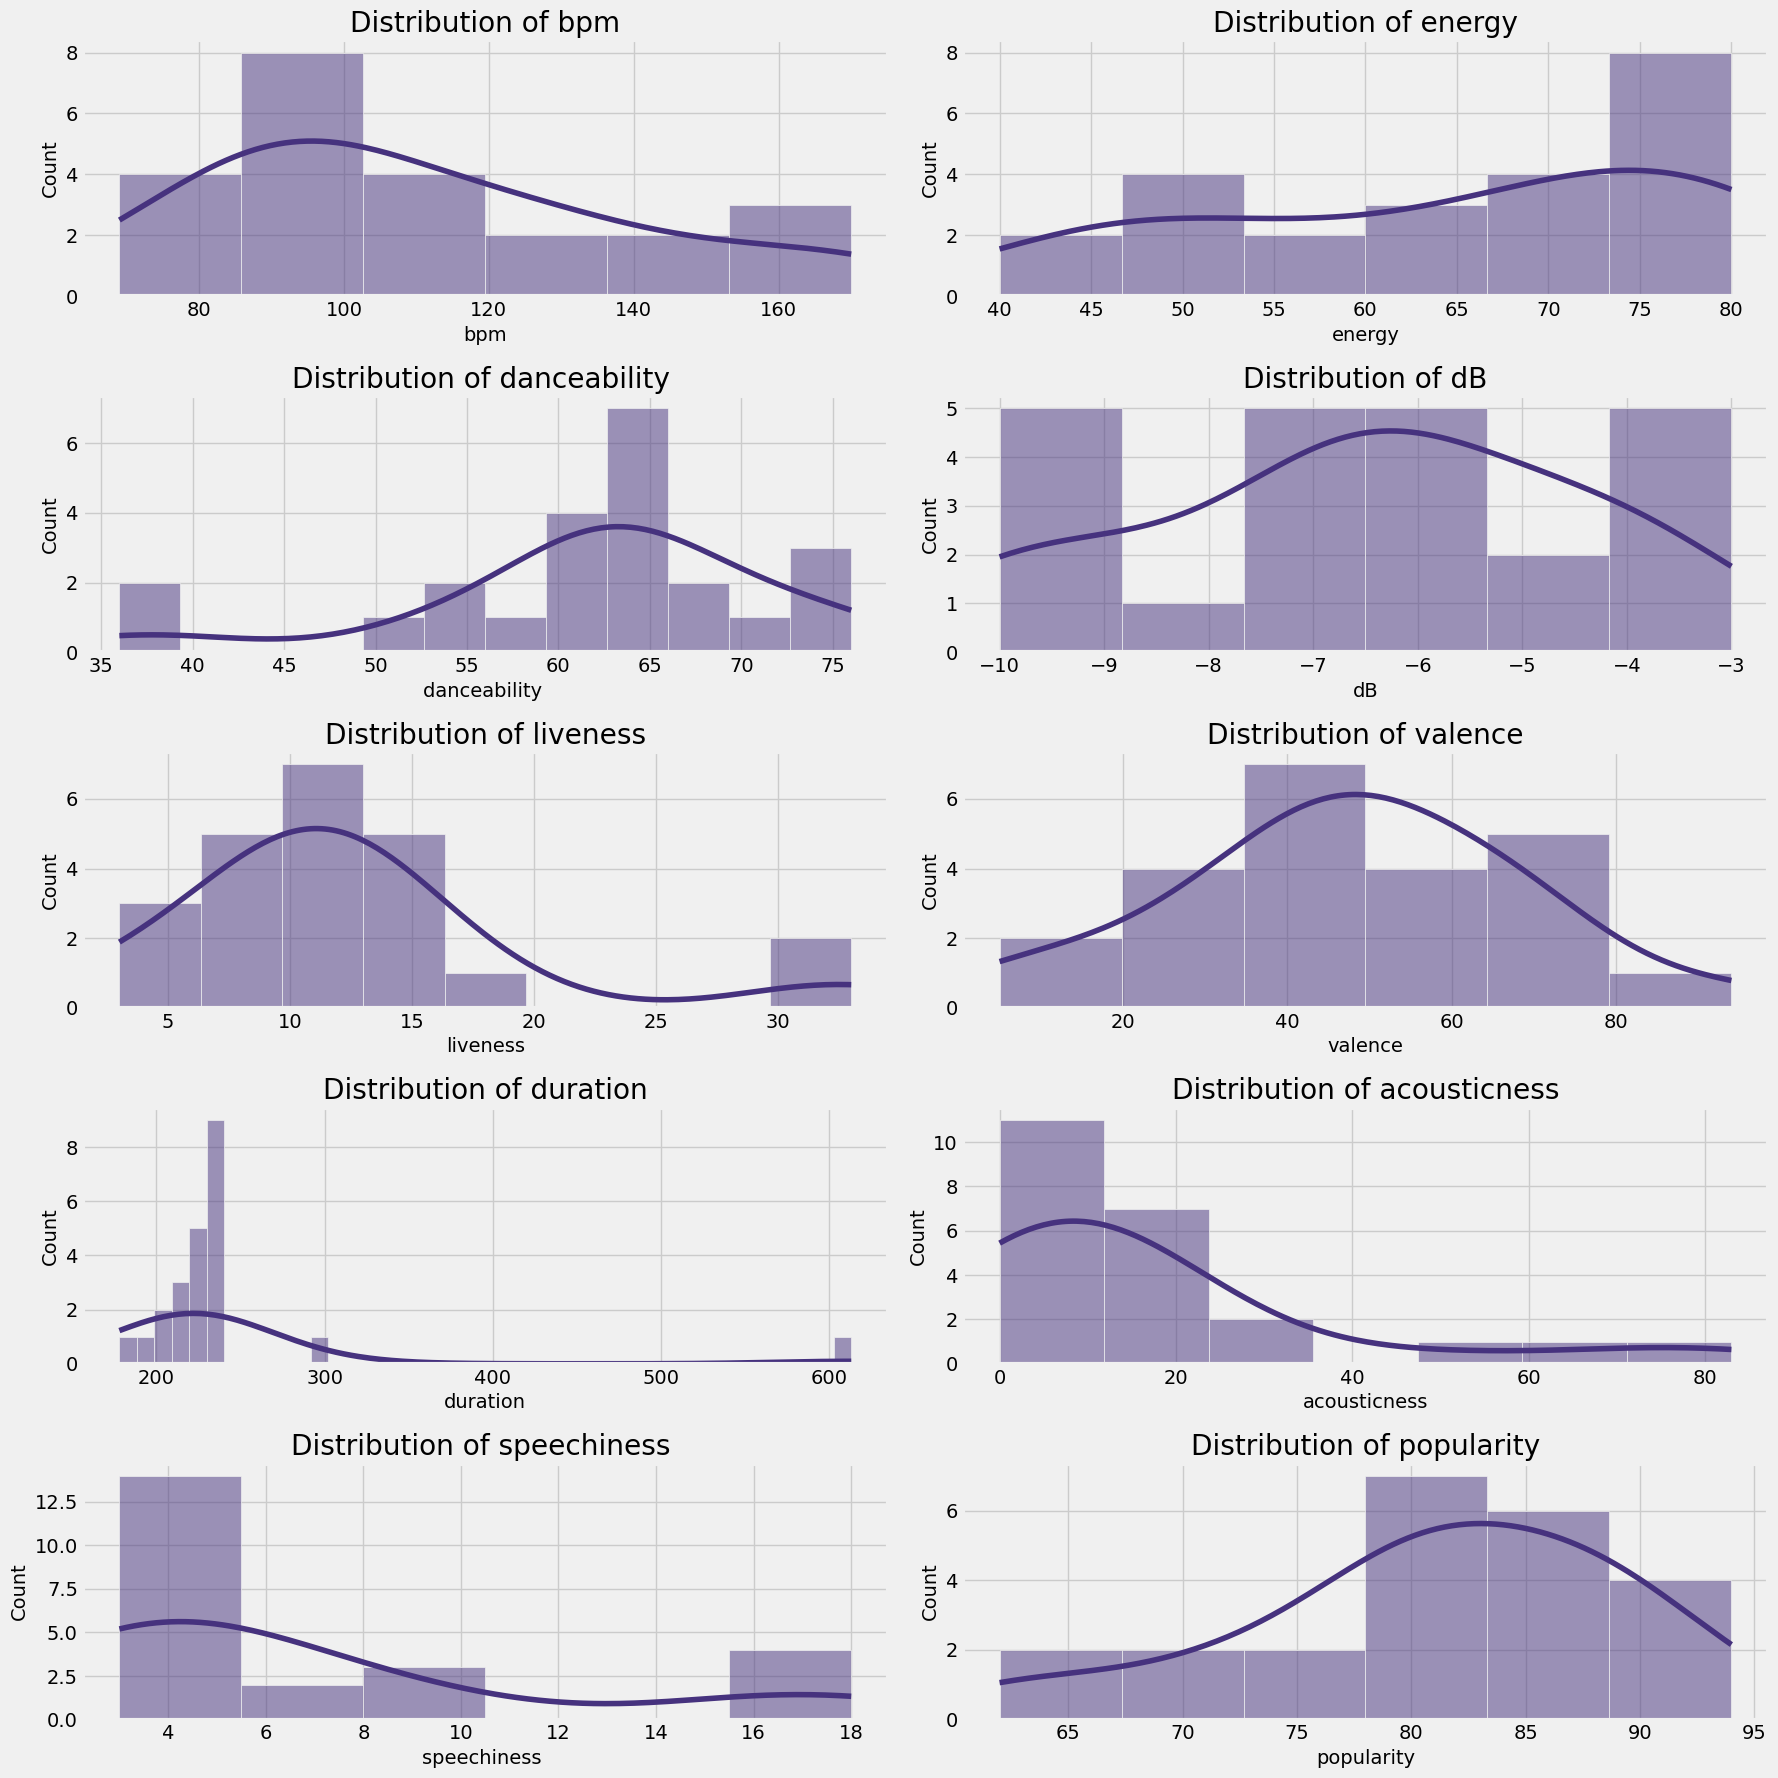

In [33]:
plt.figure(figsize=(18,18))
for i, ax in enumerate(numerical_cols):
    plt.subplot(5,2,i+1)
    sns.histplot(x=ax, data=taylor_swift, kde=True).set(title=f'Distribution of {ax}')
    plt.tight_layout()